In [1]:
# for data manipulation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', 60)

# for visualization
from IPython.core.pylabtools import figsize
from matplotlib import pyplot as plt
%matplotlib inline
# to include graphs inline within the frontends next to code
import seaborn as sns
sns.set_context(font_scale=2)

# to bypass warnings in various dataframe assignments
pd.options.mode.chained_assignment = None

# machine learning models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier

# preprocessing functions and evaluation models
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler


# 1. Explanation of Data

## 1.1. First and last rows

In [2]:
train_data = pd.read_csv('../map553-2022/train.csv')
print("Number of rows and columns in the train dataset are:", train_data.shape)

Number of rows and columns in the train dataset are: (15120, 56)


In [3]:
train_data.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,242642,2881,130,22,210,54,1020,250,221,88,342,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,309891,3005,351,14,242,-16,1371,194,215,159,842,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,287847,3226,63,14,618,2,1092,232,210,107,2018,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,516307,3298,317,8,661,60,752,198,233,174,1248,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,124860,3080,35,6,175,26,3705,219,227,144,2673,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
train_data.tail()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
15115,475155,3328,321,13,323,12,5109,186,227,180,3151,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,7
15116,514378,3455,37,5,841,92,939,220,229,146,362,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7
15117,368425,3279,90,14,404,113,1513,240,218,105,1503,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7
15118,537844,3589,357,9,418,52,1868,205,223,155,1657,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7
15119,463634,3385,345,15,350,76,3625,190,216,164,3327,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,7


In [6]:
display(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

None

In [7]:
display(train_data.describe())

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.0,15120.000000,15120.000000,15120.000000,15120.000000,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,267008.526389,2748.649934,155.834524,16.556746,228.376521,51.311706,1717.977712,213.028836,218.865741,134.477116,1527.357804,0.235979,0.037632,0.416799,0.30959,0.022421,0.041468,0.066534,0.055489,0.011971,0.044907,0.000066,0.000132,0.000265,0.138624,0.024868,0.017196,0.033929,0.011442,0.0,0.007011,0.042328,0.002910,0.003505,0.00873,0.000661,0.021958,0.049074,0.017526,0.000397,0.003175,0.000529,0.000463,0.086508,0.048677,0.020106,0.043849,0.040939,0.001190,0.006812,0.000926,0.002116,0.049206,0.041931,0.030159,4.000000
std,179261.722330,419.009589,109.745372,8.534602,209.196381,61.520488,1330.263450,30.638406,22.797288,46.070054,1116.636997,0.424623,0.190312,0.493045,0.46234,0.148052,0.199377,0.249222,0.228941,0.108758,0.207108,0.008133,0.011501,0.016263,0.345566,0.155727,0.130005,0.181051,0.106356,0.0,0.083438,0.201343,0.053868,0.059104,0.09303,0.025710,0.146550,0.216030,0.131227,0.019917,0.056256,0.022997,0.021512,0.281122,0.215200,0.140367,0.204766,0.198156,0.034484,0.082257,0.030416,0.045957,0.216306,0.200439,0.171030,2.000066
min,5.000000,1877.000000,0.000000,0.000000,0.000000,-135.000000,0.000000,52.000000,99.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,103705.000000,2373.000000,65.000000,10.000000,67.000000,5.000000,760.000000,197.000000,207.000000,106.000000,750.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,276034.500000,2754.000000,125.000000,15.000000,180.000000,32.000000,1315.000000,220.000000,223.000000,138.000000,1266.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00

## 1.3. Check for Anomalies & Outliers

**Extreme Outliers**   
- x < Q1 - 3 * IQR       
- x > Q3 + 3 * IQR

In [8]:
def outlier_function(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [9]:
# loop through all columns to see if there are any outliers
for column in train_data.columns:
    if outlier_function(train_data, column)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(train_data, column)[2], column))

There are 33 outliers in Horizontal_Distance_To_Hydrology
There are 51 outliers in Vertical_Distance_To_Hydrology
There are 10 outliers in Hillshade_9am
There are 15 outliers in Hillshade_Noon
There are 158 outliers in Horizontal_Distance_To_Fire_Points
There are 3568 outliers in Wilderness_Area1
There are 569 outliers in Wilderness_Area2
There are 339 outliers in Soil_Type1
There are 627 outliers in Soil_Type2
There are 1006 outliers in Soil_Type3
There are 839 outliers in Soil_Type4
There are 181 outliers in Soil_Type5
There are 679 outliers in Soil_Type6
There are 1 outliers in Soil_Type7
There are 2 outliers in Soil_Type8
There are 4 outliers in Soil_Type9
There are 2096 outliers in Soil_Type10
There are 376 outliers in Soil_Type11
There are 260 outliers in Soil_Type12
There are 513 outliers in Soil_Type13
There are 173 outliers in Soil_Type14
There are 106 outliers in Soil_Type16
There are 640 outliers in Soil_Type17
There are 44 outliers in Soil_Type18
There are 53 outliers in So

I am going to take a close look for the outlier elimination for the following columns:
* Horizontal_Distance_To_Hydrology
* Vertical_Distance_To_Hydrology
* Horizontal_Distance_To_Roadways
* Horizontal_Distance_To_Fire_Points

I am not going to consider other columns for potential outlier elimination because their data range is already fixed between 0 and 255 (e.g. Hillsahde columns)  or they seem like one-hot-encoded columns (e.g. Soil type and Wilderness areas).

Recall the data ranges of those 4 columns:
* Horizontal_Distance_To_Hydrology: 0, 1343
* Vertical_Distance_To_Hydrology: -146, 554
* Horizontal_Distance_To_Roadways: 0, 6890
* Horizaontal_Distance_To_Firepoints: 0, 6993

Considering the Horizaontal_Distance_To_Firepoints having the highest number of outliers and widest data range, I am going to remove outliers only from that column.

In [10]:
train_data = train_data[(train_data['Horizontal_Distance_To_Fire_Points'] > outlier_function(train_data, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (train_data['Horizontal_Distance_To_Fire_Points'] < outlier_function(train_data, 'Horizontal_Distance_To_Fire_Points')[1])]
train_data.shape

(14962, 56)

Number of the rows in the dataset is approximately 15000, after the removal.

## 1.4. Findings from Understand, Clean and Format Data
Training dataset (train_data dataframe) has 15120 entries and 56 columns with headers appropriately named. Dataset is clean and well-formatted, meaning it had no missing values and every column has a numeric (float or integer) data type. 

4 columns had outliers, outliers of the `Horizontal_Distance_To_Fire_Points` is removed considering this column has a wider range and has the most number of outliers.

`Cover_Type` is our label/target column. `Wilderness_Area` and `Soil_Type` columns might have binary values (0,1) if so, they are the one-hot-encoded columns of 4 wilderness areas and 40 soil types respectively. I am going to start exploratory data analysis by seeking answer to that suspicion.

# 2. Exploratory Data Analysis

## 2.1. Check if Wilderness_Area and Soil_Type columns have only binary values

In [12]:
# list of columns of wilderness areas and soil types
is_binary_columns = [column for column in train_data.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(train_data[is_binary_columns].values.ravel())

array([1, 0])

Yes, they only have binary values.

In [14]:
# sum of all widerness area columns
train_data["w_sum"] = train_data["Wilderness_Area1"] + train_data["Wilderness_Area2"] + train_data["Wilderness_Area3"] + train_data["Wilderness_Area4"]
print(train_data.w_sum.value_counts())

1    14962
Name: w_sum, dtype: int64


In [15]:
# create a list of soil_type columns
soil_columns = [c for c in train_data.columns if "Soil" in c]
train_data["soil_sum"] = 0

# sum of all soil type columns
for c in soil_columns:
    train_data["soil_sum"] += train_data[c]

print(train_data.soil_sum.value_counts())

1    14962
Name: soil_sum, dtype: int64


In [16]:
train_data.drop(columns=["w_sum", "soil_sum"], inplace=True)

`Wilderness_Area` and `Soil_Type1-40` having only binary values and only one `soil_type` or `wilderness_area` being equal to 1, shows that they are one-hot-encoded columns.

One important thing about fantastic trees are, they can only belong to one soil type or one wilderness area.

## 2.3. Distribution of the Fantastic Trees

/Users/chhoutlaychiva/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


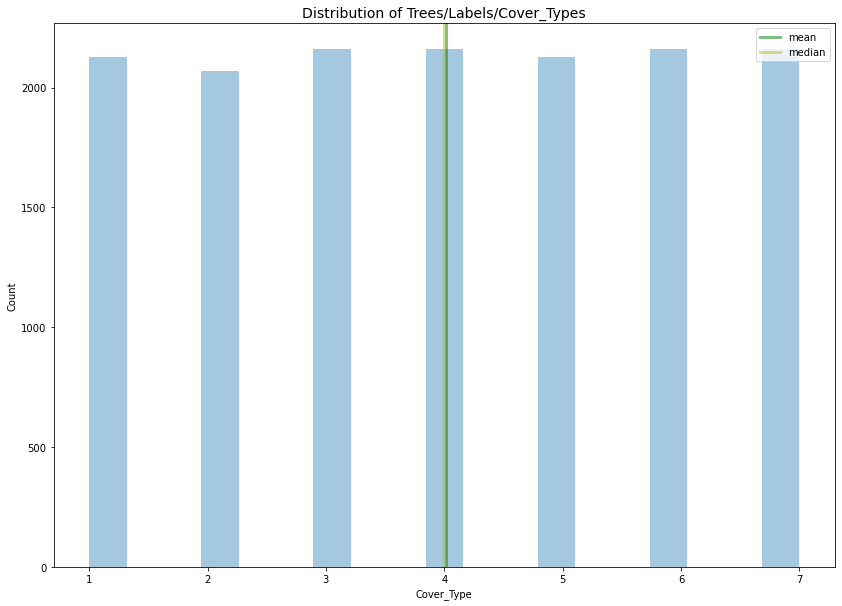

In [17]:
# set the plot size
figsize(14,10)

# set the histogram, mean and median
sns.distplot(train_data["Cover_Type"], kde=False)
plt.axvline(x=train_data.Cover_Type.mean(), linewidth=3, color='g', label="mean", alpha=0.5)
plt.axvline(x=train_data.Cover_Type.median(), linewidth=3, color='y', label="median", alpha=0.5)

# set title, legends and labels
plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of Trees/Labels/Cover_Types", size=14)
plt.legend(["mean", "median"])

Distribution of fantastic trees shows perfect uniform distribution.

Here are the 7 types of the fantastic trees, numbered from 1 to 7 in the `Cover_Type` column:

1) Spruce/Fir

2) Lodgepole Pine

3) Ponderosa Pine

4) Cottonwood/Willow

5) Aspen

6) Douglas-fir

7) Krummholz

## 2.4. Check if the Cover_Type shows non-uniform distribution among different Wilderness_Areas

Text(0.5, 1.0, 'Density of Cover Types Among Different Wilderness Areas')

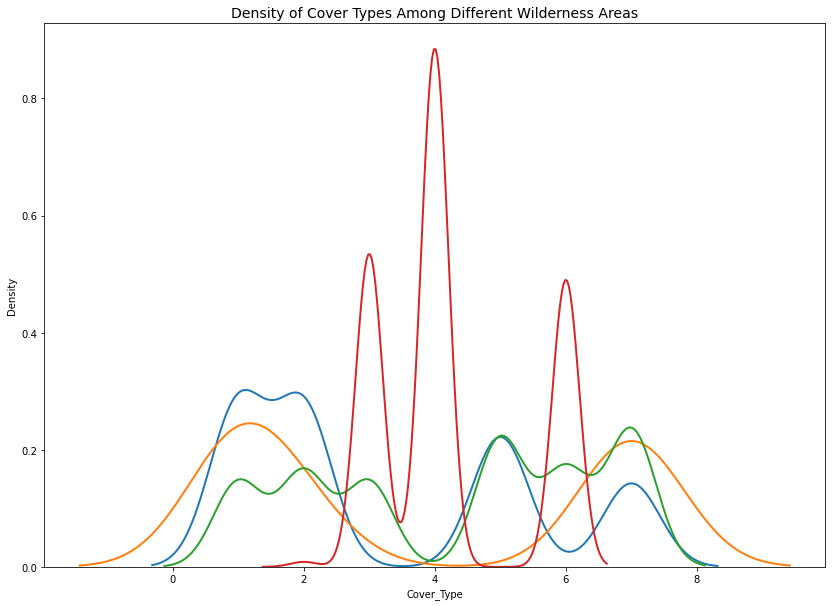

In [19]:
# Create one column as Wilderness_Area_Type and represent it as categorical data
train_data['Wilderness_Area_Type'] = (train_data.iloc[:, 11:15] == 1).idxmax(1)

#list of wilderness areas
wilderness_areas = sorted(train_data['Wilderness_Area_Type'].value_counts().index.tolist())

# distribution of the cover type in different wilderness areas
figsize(14,10)

# plot cover_type distribution for each wilderness area
for area in wilderness_areas:
    subset = train_data[train_data['Wilderness_Area_Type'] == area]
    sns.kdeplot(subset["Cover_Type"], label=area, linewidth=2)

# set title, legends and labels
plt.ylabel("Density")
plt.xlabel("Cover_Type")
plt.title("Density of Cover Types Among Different Wilderness Areas", size=14)

Nother important finding about Fantastic Trees: Wilderness area is an important feature to determine the cover type:
* Spruce/Fir, Lodgepole Pine and Krummholz (Cover_Type 1, 2, 7)  mostly found in Rawah, Neota and Comanche Peak Wilderness Area(1,2 and 3).
* It is highly likely to find Ponderosa Pine (Cover_Type 3) in Cache la Poudre Wilderness Area (4) rather than other areas.
* Cottonwood/Willow (Cover_Type 4) seems to be found only in Cache la Poudre Wilderness Area (4).
* Aspen (Cover_Type 5) is equally likely to come from wilderness area Rawah and Comanche (1,3).
* Douglas-fir (Cover_Type 6) can be found in any of the wilderness areas.

Note that, distribution of cover types extend more than the range because of the kernel density estimation.

## 2.5. Understanding the Soil_Type and Cover_Type relationship

Since different soil types might appear in different wilderness areas, I am going to consider different wilderness areas while examining this relationship.

In [20]:
def split_numbers_chars(row):
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [21]:
reverse_one_hot_encode(train_data, 16, 56, "Soil_Type")

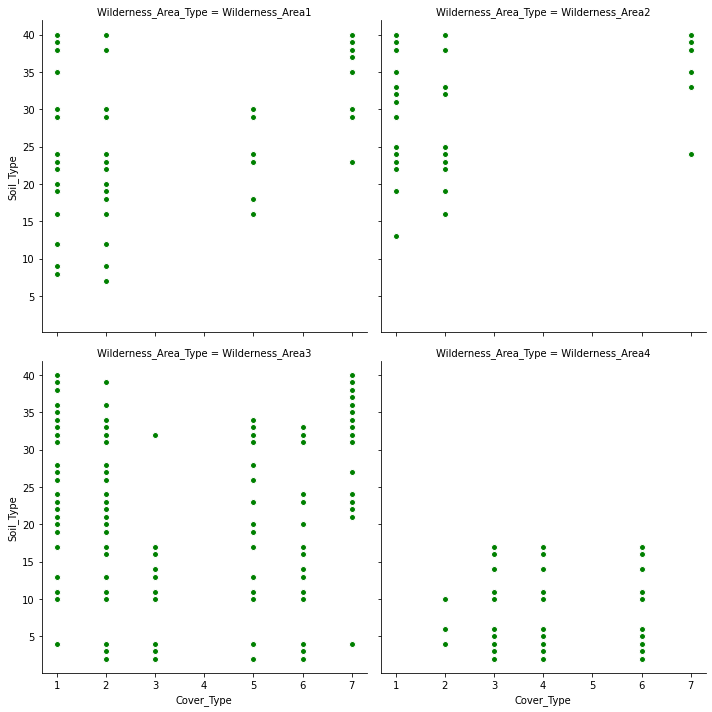

In [22]:
# plot relationship of soil type and cover type among different wilderness areas
g = sns.FacetGrid(train_data, col="Wilderness_Area_Type", 
                  col_wrap=2, height=5, col_order=wilderness_areas)
g = g.map(plt.scatter,"Cover_Type", "Soil_Type", edgecolor="w", color="g")

* Wilderness Area 3 is more diverse in soil type and cover type.
* Only soil types 1 through 20 is represented in Wilderss Area 4, thus cover types in that area grew with them.
* Cover type 7 seems to grow with soil types 25 through 40.
* Cover Type 5 and 6 can grow with most of the soil types.
* Cover Type 3 loves soil type 0 through 15.
* Cover Type 1 and 2 can grow with any soil type.

## 2.6. Distribution and relationship of continuous variables (Elevation, Aspect, Slope, Distance and Hillsahde columns)

In [23]:
# store continious variables in a list
continuous_variables = train_data.columns[1:11].tolist()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

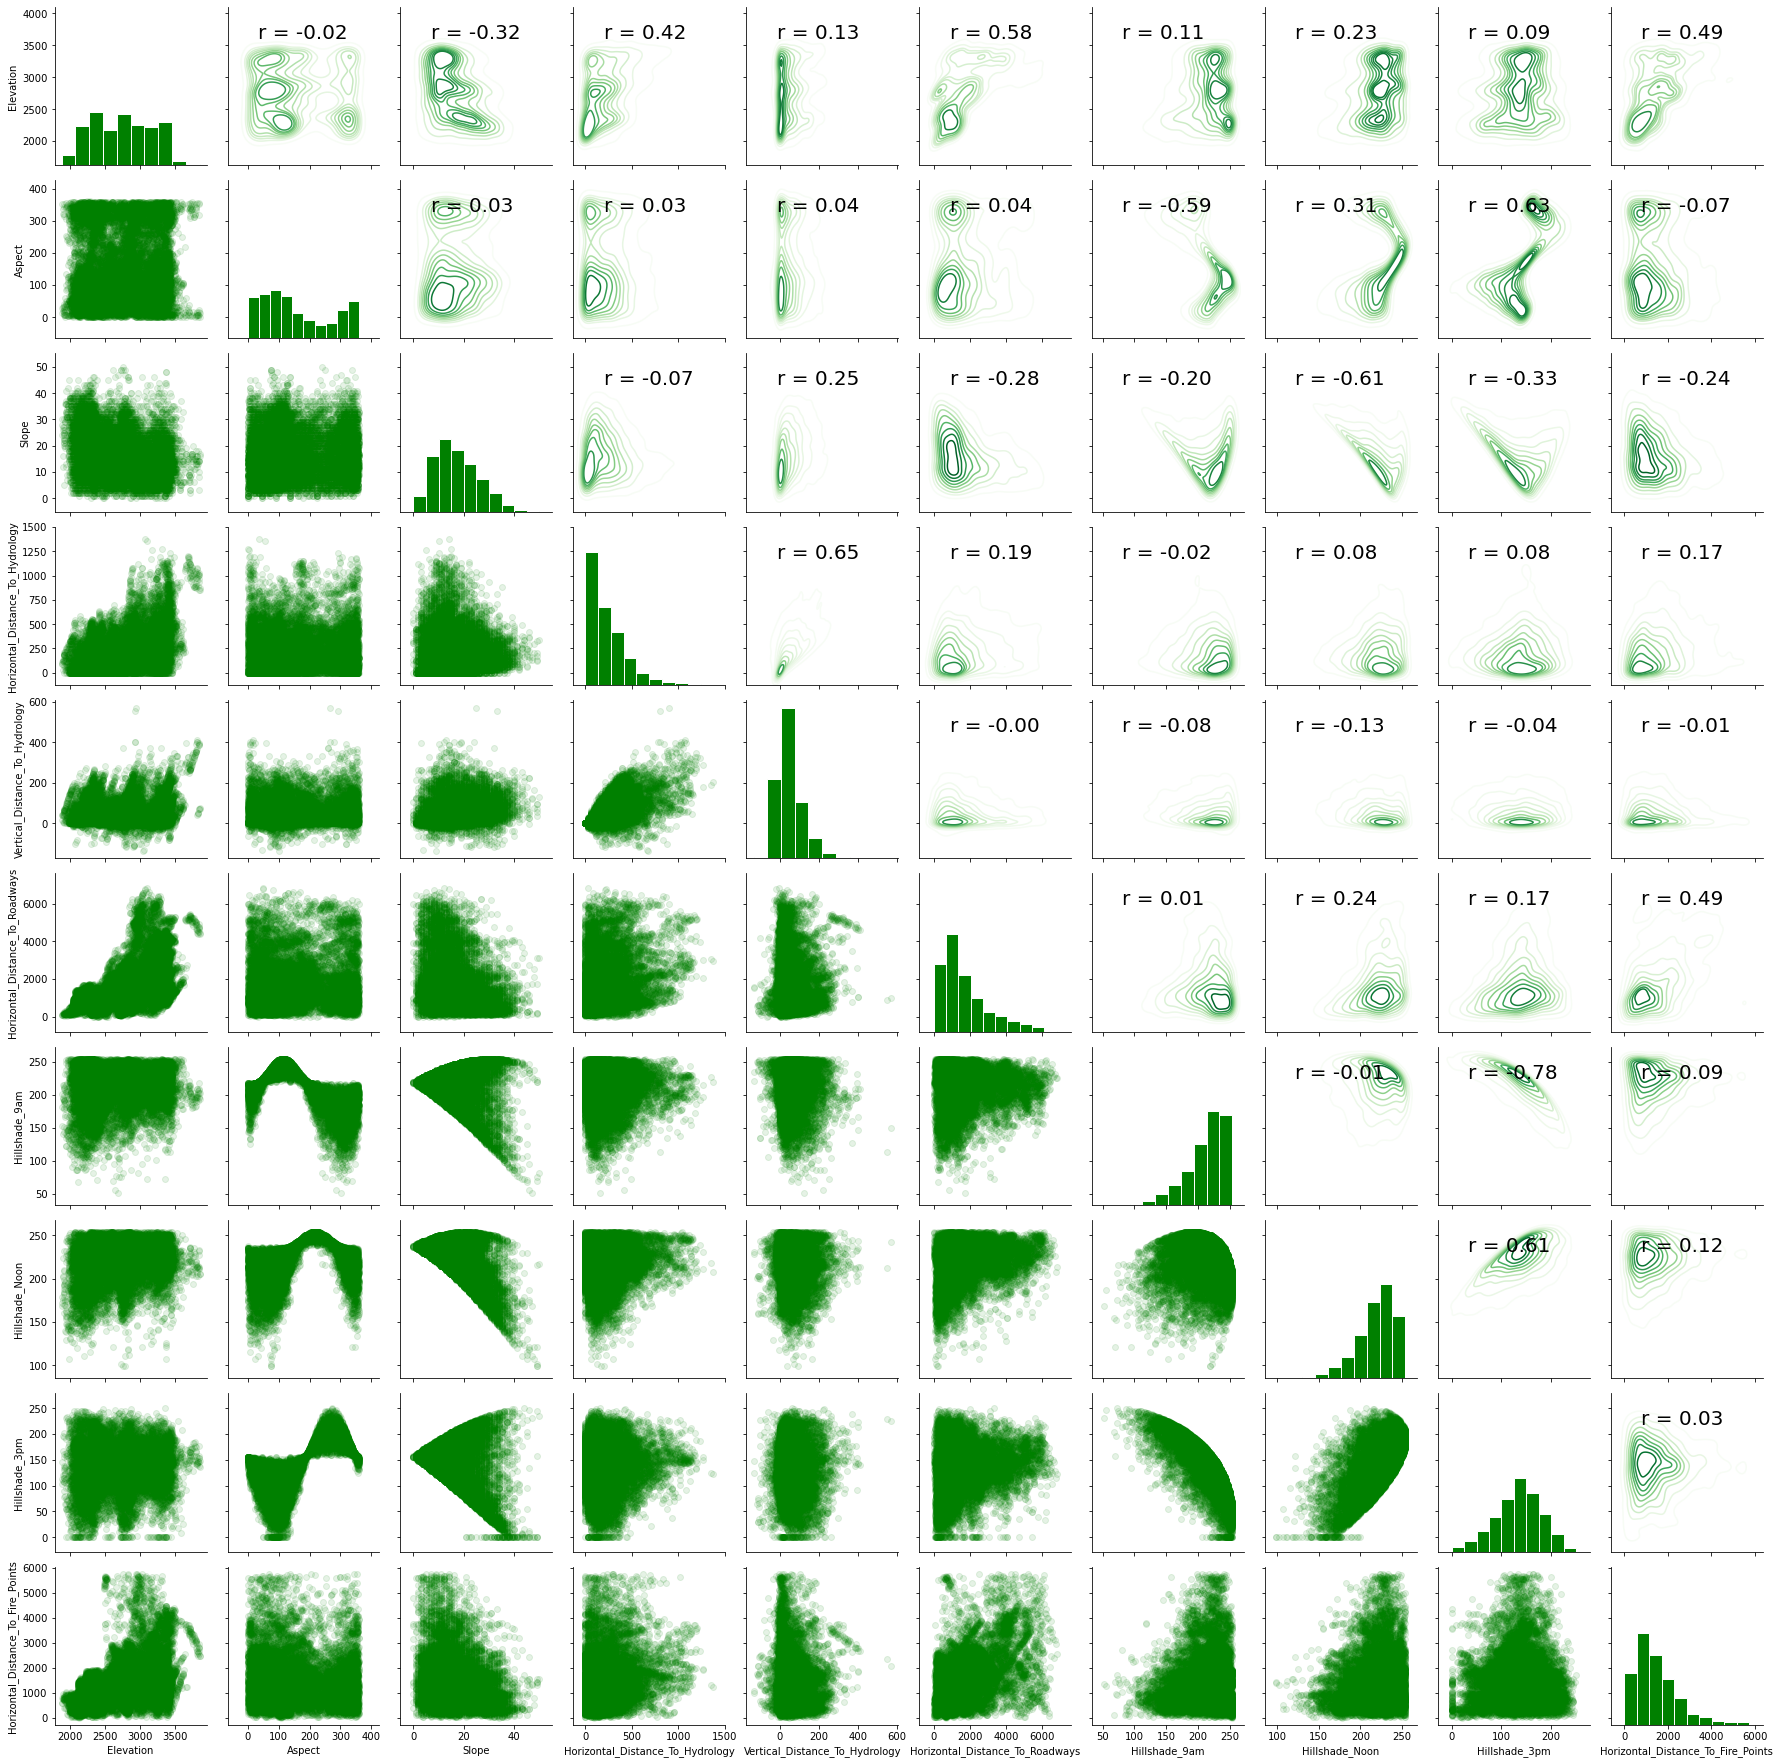

In [24]:
# Create the pairgrid object
grid = sns.PairGrid(data = train_data[continuous_variables])

# Upper is a correlation and kdeplot
grid.map_upper(corr_func);
grid.map_upper(sns.kdeplot, cmap = plt.cm.Greens)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'green', edgecolor = 'white')

# Bottom is scatter plot
grid.map_lower(plt.scatter, color = 'green', alpha = 0.1)

**Distributions:**
* `Hillshade_9am` and `Hillshade_Noon` has bi-modal and left-skewed distributions.
* `Horizontal_Distance_To_Firepoints`, `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Hydrology` has bi-modal and right-skewed distributions.
* `Elevation` (height of a fantastic trees) resembles a uniform distribution.
* `Slope`, `Vertical_Distance_To_Hydrology`, `Hillshade_3pm` shows a symmetric and bi-modal distribution.

**Some obvious relationships between the continuous features:**
*  `Elevation` and shows positive trend with following variables:
   * `Vertical_Distance_To_Hydrology`
   * `Horizontal_Distance_To_Roadways`
   * `Horizontal_Distance_To_Firepoints`
   * `Horizontal_Distance_To_Hydrology`
* As `Aspect` increases; `Hillshade_Noon` and `Hillshade_3pm` increases.
* `Slope` has negative trend with:
  * `Elevation`
  * `Horizontal_Distance_To_Roadways`
  * `Hillshade_9am`, `Hillshade_Noon` and `Hillshade_3pm`
  * `Horizontal_Distance_To_Firepoints`
* `Horizontal_Distance_To_Hydrology`  has positive trend with:
  * `Horizontal_Distance_To_Firepoints`
  * `Horizontal_Distance_To_Roadways`
  * `Vertical_Distance_To_Hydrology`
* `Vertical_Distance_To_Hydrology` - `Slope` and `Vertical_Distance_To_Hydrology` - `Horizontal_Distance_To_Hydrology` has obvious collinear relationship.
* As `Horizontal_Distance_To_Roadways` increases, `Horizontal_Distance_To_Firepoints` increases and `Slope` decreases.
* `Hillshade_9am` shows negative trend with `Hillshade_3pm` and `Aspect`, as `Hillshade_9am` increases `Elevation` increases.
* `Hillshade_Noon` has positive trend with:
  * `Elevation`
  * `Aspect`
  * `Horizontal_Distance_To_Roadways`
  * `Hillshade_3pm` 
  * `Horizontal_Distance_To_Firepoints`
* `Hillshade_3pm` shows perfect negative relationship with `Hillshade_9am` and perfect positive relationship with `Hillshade_Noon`.

**Some Collinear features:**
* hillshade noon - hillshade 3 pm
* hillsahde 3 pm - hillshade 9 am
* vertical distance to hydrology - horizontal distance to hydrology
* elevation - slope

## 2.7. Visualize some collinear features with Cover_Type

Text(0.5, 1.0, 'Elevation VS Slope')

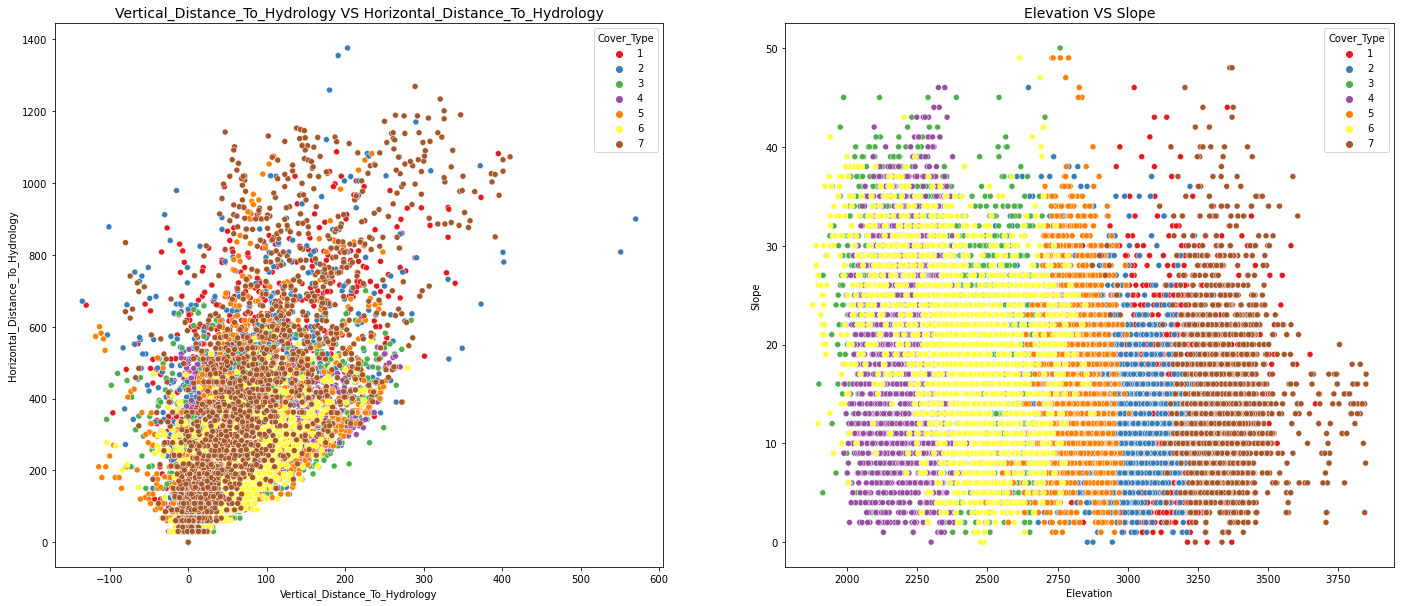

In [26]:
figsize(24,10)

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Vertical_Distance_To_Hydrology", y="Horizontal_Distance_To_Hydrology", 
                hue="Cover_Type", data=train_data, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Vertical_Distance_To_Hydrology VS Horizontal_Distance_To_Hydrology", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Elevation", y="Slope", 
                hue="Cover_Type", data=train_data, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Elevation VS Slope", size=14)

Text(0.5, 1.0, 'Hillshade_9am VS Hillshade_3pm')

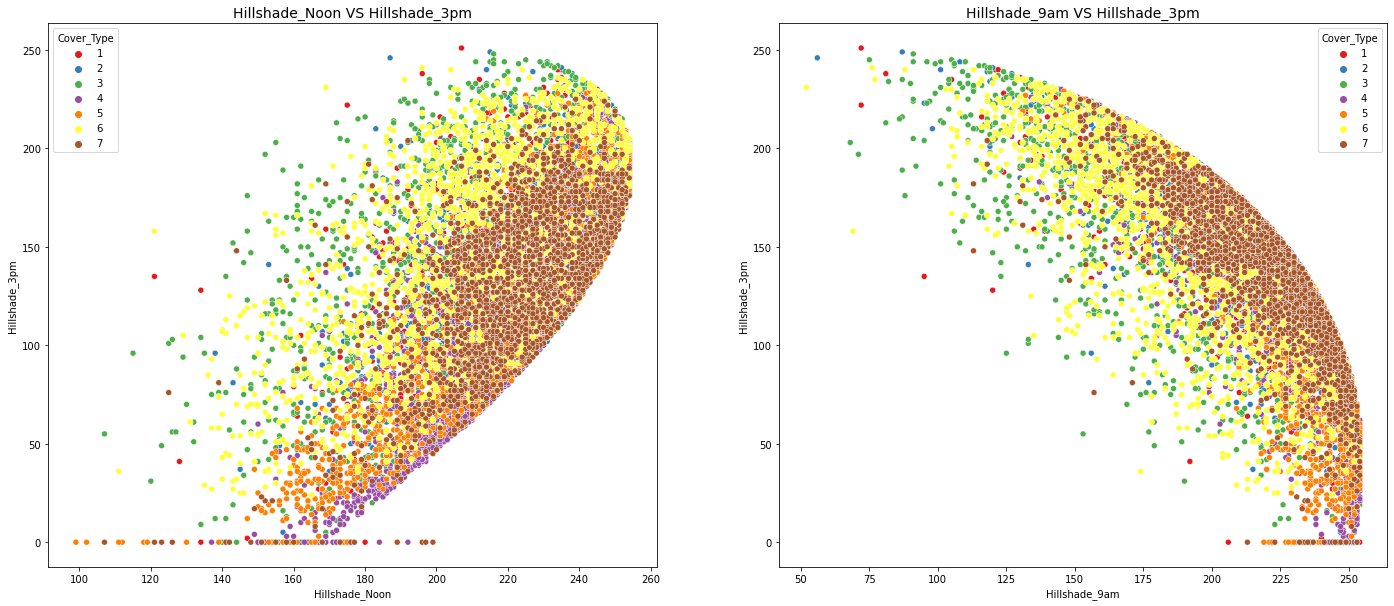

In [27]:
figsize(24,10)

# plot the first subplot
plt.subplot(1,2,1)
sns.scatterplot(x="Hillshade_Noon", y="Hillshade_3pm", 
                hue="Cover_Type", data=train_data, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_Noon VS Hillshade_3pm", size=14)

# plot the second subplot
plt.subplot(1,2,2)
sns.scatterplot(x="Hillshade_9am", y="Hillshade_3pm", 
                hue="Cover_Type", data=train_data, 
                legend="full", hue_norm=(0,8), palette="Set1")
plt.title("Hillshade_9am VS Hillshade_3pm", size=14)

One of the features from the Hillshade_9am or Hillshade_3pm or Hillshade_Noon will be dropped when determining the training set. Which one to be eliminated will be determined after looking at the Pearson Coeffiecients with the label.

## 2.8. Pearson Coefficients of all features

Text(0.5, 1.05, 'Pearson Correlation of All Features')

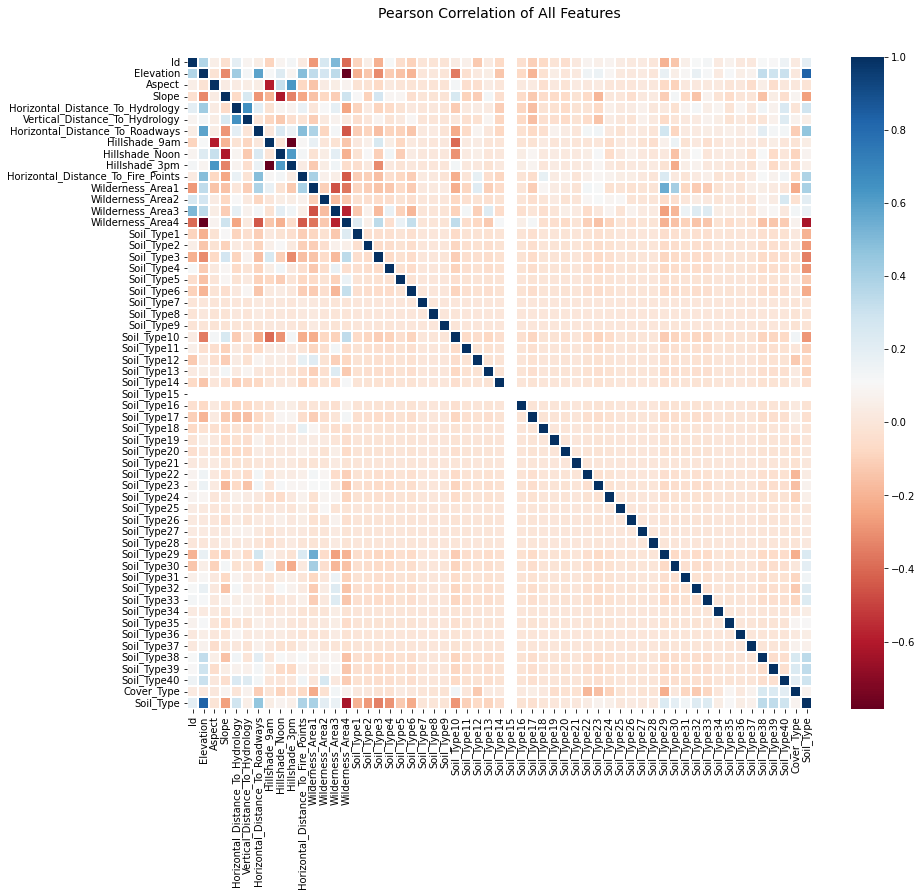

In [28]:
plt.figure(figsize=(14,12))

# plot heatmap set the title
colormap = plt.cm.RdBu
sns.heatmap(train_data.corr(),linewidths=0.1,vmax=1.0, 
            square=False, cmap=colormap, linecolor='white', annot=False)
plt.title('Pearson Correlation of All Features', y=1.05, size=14)

None of the features are significantly different effect on determining the label cover type.

One interesting finding though, Soil Type 7 and 15 columns are blank in the heatmap, thus zero effect on determining the label Cover_Type. 

Approximately 5 (1 percent of all soil types) soil_type columns affects the cover type.

Can we get a better picture if we use soil_type as one numeric column rather than seperate one-hot-encoded columns?

## 2.9. Pearson coefficients with numeric Soil_Type representation

Text(0.5, 1.0, 'Pearson Correlation of Features with Numeric Soil_Type')

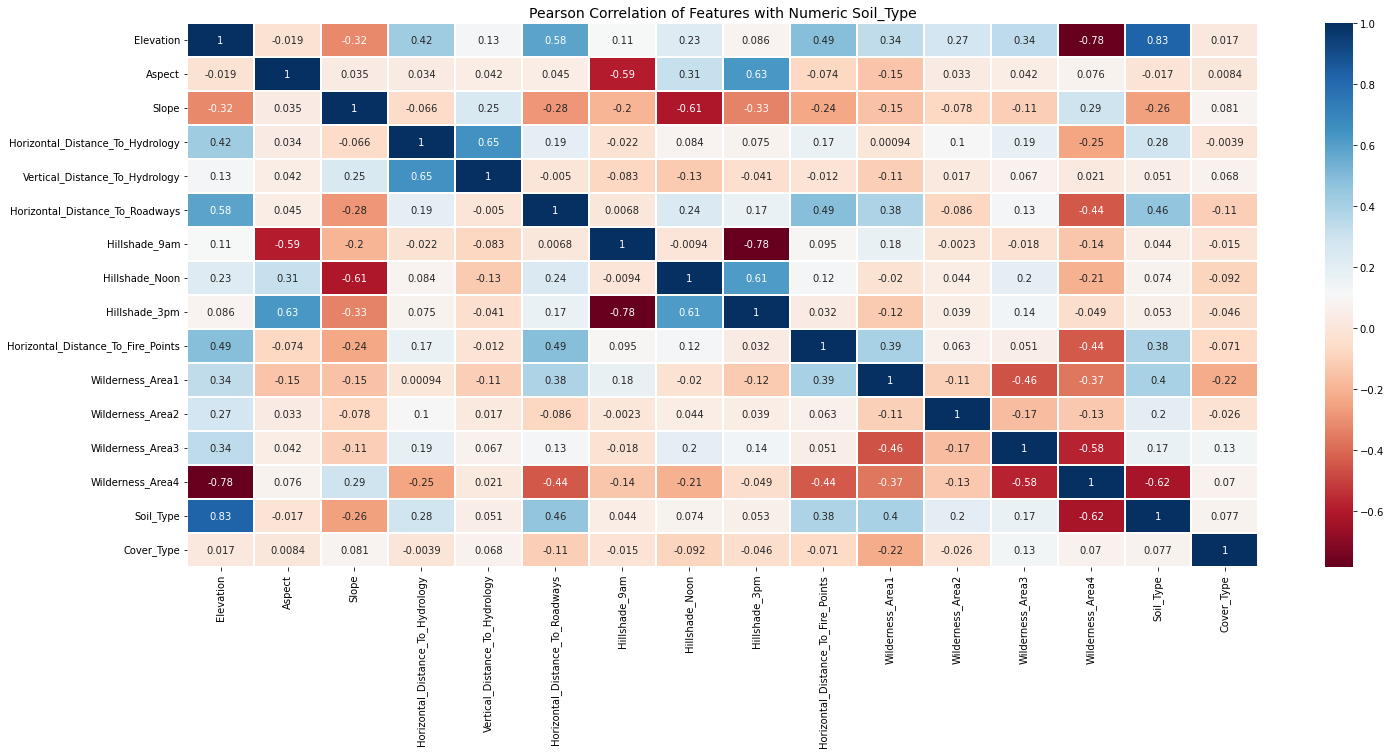

In [31]:
# make a list of numeric features and create a dataframe with them
all_features_w_label = continuous_variables + wilderness_areas + ["Soil_Type"] + ["Cover_Type"]
train_data_w_numeric_soil = train_data[all_features_w_label]

# pearson coefficients with numeric soil type column
correlations = pd.DataFrame(train_data_w_numeric_soil.corr())

figsize=(16,14)

# plot the heatmap
colormap = plt.cm.RdBu
sns.heatmap(correlations,linewidths=0.1, 
            square=False, cmap=colormap, linecolor='white', annot=True)
plt.title('Pearson Correlation of Features with Numeric Soil_Type', size=14)

## 2.10. Findings From Exploratory Data Analysis
<p> Data set have balanced labels, resulting in equal number of cover types. This will be an advantage when it comes to apply classification ML models because, the model will have good chance to learn patterns of all labels, eliminating the probability of underfitting. <p/>
<p> Different wilderness areas consist of some specific trees. Interestingly, there is one fantastic tree, Cottonwood/Willow, specifically likes to grow in wilderness area 4. While cover types 1, 2, 5 and 6 can grow in any soil type, other cover types grows more with specific soil types. <p/>
<p> Soil types are reverse-one-hot-encoded, meaning they are going to be included as numeric data in the training set and one-hot-encoded soil type columns will be excluded. With that way, there is a stronger correlation between soil type and Cover_Type. Numeric soil type column and other variables have pearson coefficients in the range of [-0.2, 0.1]. <p/>
<p> Hillshade columns are collinear within each other and Hillshade_9am has the least importance in determining Cover_Type. Thus this column will be dropped in Part 3 for better interpretability of the future model. <p/>

# 3. Feature Engineering & Selection

## 3.1. Add & Transform Features

In the data set, the strongest positive pearson coefficient is 0.22 and -0.11 on the other end. After doing some Google Search about the features, maybe adding some features might help achieving stronger correlations. 

I decided to add linear combinations of the horizontal distance columns and  Euclidian distance of Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology as suggested in this [presentation](https://www.slideshare.net/danielgribel/forest-cover-type-prediction-56288946?next_slideshow=2).

* Elevation and Vertical Distance to Hydrology
* Horizontal Distance to Hydrology and Horizontal Distance to Firepoints
* Horizontal Distance to Hydrology and Horizontal Distance to Roadways 
* Horizontal Distance to Firepoints and Horizontal Distance to Roadways
* Euclidian Distance of Horizontal Distance to Hydrology and Vertical Distance to Hydrology

After the addition, I will perform square root transformation to the features with positive data range. Square root transformation might help especially for the highly skewed distributions.

After the addition and transformation, I will check pearson coefficients again.

In [32]:
# add columns
train_data_w_numeric_soil['Euclidian_Distance_To_Hydrology'] = (train_data_w_numeric_soil['Horizontal_Distance_To_Hydrology']**2 + 
                                                           train_data_w_numeric_soil['Vertical_Distance_To_Hydrology']**2)**0.5
train_data_w_numeric_soil['Mean_Elevation_Vertical_Distance_Hydrology'] = (train_data_w_numeric_soil['Elevation'] + 
                                                                      train_data_w_numeric_soil['Vertical_Distance_To_Hydrology'])/2
train_data_w_numeric_soil['Mean_Distance_Hydrology_Firepoints'] = (train_data_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                              train_data_w_numeric_soil['Horizontal_Distance_To_Fire_Points'])/2
train_data_w_numeric_soil['Mean_Distance_Hydrology_Roadways'] = (train_data_w_numeric_soil['Horizontal_Distance_To_Hydrology'] + 
                                                            train_data_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2
train_data_w_numeric_soil['Mean_Distance_Firepoints_Roadways'] = (train_data_w_numeric_soil['Horizontal_Distance_To_Fire_Points'] + 
                                                             train_data_w_numeric_soil['Horizontal_Distance_To_Roadways'])/2

In [33]:
# add sqrt transformed columns to the trees_w_numeric_soil dataframe
for col in train_data_w_numeric_soil.columns:
    if train_data_w_numeric_soil[col].min() >= 0:
        if col == 'Cover_Type':
            next
        else:
            train_data_w_numeric_soil['sqrt' + col] = np.sqrt(train_data_w_numeric_soil[col])

In [34]:
correlations_transformed = pd.DataFrame(train_data_w_numeric_soil.corr())
correlations_transformed = pd.DataFrame(correlations_transformed["Cover_Type"]).reset_index()

# format, and display sorted correlations_transformed
correlations_transformed.columns = ["Feature", "Correlation with Cover_Type"]
correlations_transformed = (correlations_transformed[correlations_transformed["Feature"] != "Cover_Type"]
                .sort_values(by="Correlation with Cover_Type", ascending=True))
display(correlations_transformed)

,Feature,Correlation with Cover_Type
30,sqrtWilderness_Area1,-0.219949
10,Wilderness_Area1,-0.219949
5,Horizontal_Distance_To_Roadways,-0.109985
20,Mean_Distance_Firepoints_Roadways,-0.107544
19,Mean_Distance_Hydrology_Roadways,-0.106105
39,sqrtMean_Distance_Firepoints_Roadways,-0.102787
38,sqrtMean_Distance_Hydrology_Roadways,-0.094659
25,sqrtHorizontal_Distance_To_Roadways,-0.092933
7,Hillshade_Noon,-0.091584
27,sqrtHillshade_Noon,-0.091516


So, in addition to the existing features, final features will be:
* Instead of Horizontal_Distance_To_Hydrology, sqrtHorizontal_Distance_To_Hydrology
* sqrtMean_Distance_Hydrology_Roadways
* sqrtEuclidian_Distance_To_Hydrology
* Mean_Elevation_Vertical_Distance_Hydrology
* Mean_Distance_Firepoints_Roadways
* Mean_Distance_Hydrology_Firepoints

Additionally, I will drop Hillshade_9am column since it is strongly correlated with Hillshadde_3pm.

In [35]:
# final list of features
transformed_features = ['sqrtHorizontal_Distance_To_Hydrology', 'sqrtMean_Distance_Hydrology_Roadways', 'sqrtEuclidian_Distance_To_Hydrology', 
                        'Mean_Elevation_Vertical_Distance_Hydrology', 'Mean_Distance_Firepoints_Roadways', 'Mean_Distance_Hydrology_Firepoints',  ]

all_features =  (['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 
                  'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points' ] + wilderness_areas +
                 ['Soil_Type'] + transformed_features)

## 3.2. Seperate labels from features in the training set

In [36]:
training = train_data_w_numeric_soil[all_features]
labels_training = train_data_w_numeric_soil["Cover_Type"]

In [48]:
training.head()

,Elevation,Aspect,Slope,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type,sqrtHorizontal_Distance_To_Hydrology,sqrtMean_Distance_Hydrology_Roadways,sqrtEuclidian_Distance_To_Hydrology,Mean_Elevation_Vertical_Distance_Hydrology,Mean_Distance_Firepoints_Roadways,Mean_Distance_Hydrology_Firepoints
0,2881,130,22,54,1020,221,88,342,1,0,0,0,30,14.491377,24.799194,14.725207,1467.5,681.0,276.0
1,3005,351,14,-16,1371,215,159,842,0,0,1,0,24,15.556349,28.398944,15.573322,1494.5,1106.5,542.0
2,3226,63,14,2,1092,210,107,2018,1,0,0,0,29,24.859606,29.240383,24.859671,1614.0,1555.0,1318.0
3,3298,317,8,60,752,233,174,1248,0,1,0,0,23,25.709920,26.580068,25.762716,1679.0,1000.0,954.5
4,3080,35,6,26,3705,227,144,2673,1,0,0,0,24,13.228757,44.045431,13.301161,1553.0,3189.0,1424.0


## 3.3. Split training set as training and validation set

In [37]:
X_train, X_valid, y_train, y_valid = train_test_split(training, labels_training, test_size=0.2, random_state=1)

In [38]:
print('Training Data Shape:', X_train.shape)
print('Validation Data Shape:', X_valid.shape)

Training Data Shape: (11969, 19)
Validation Data Shape: (2993, 19)


In [39]:
print('Training Label Shape:', y_train.shape)
print('Validation Label Shape:', y_valid.shape)

Training Label Shape: (11969,)
Validation Label Shape: (2993,)


Training, validation and test set have the same number of columns.

## 3.4. Create a baseline metric

Before diving deep into the ML classification algorithms, I am going to calculate a common sense baseline. A common sense baseline is defined in this [article](https://towardsdatascience.com/first-create-a-common-sense-baseline-e66dbf8a8a47) in simple terms, how a person has a knowledge in that field would solve the problem without using any data science tricks. Alternatively, as explained in this [post](https://machinelearningmastery.com/implement-baseline-machine-learning-algorithms-scratch-python/), it can be a dummy or simple algorithm, consisting of few lines of code, to use as a baseline metric.

Baseline metrics can be [different](https://machinelearningmastery.com/how-to-get-baseline-results-and-why-they-matter/) in regression and classification problems. Since fantastic trees will be classified into 7 groups and no expert wizards available around, I am going to use [dummy algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) from scikit-learn library. With that dummy algorithm, I will establish a baseline metric of accuracy which is percentage of correctly predicted trees among the test dataset .

Baseline metrics are important in a way that, if a ML model cannot beat the simple and intuitive prediction of a person's or an algorithm's guess, the original problem needs reconsideration or training data needs reframing.

In [40]:
# Create dummy classifer
dummy = DummyClassifier(strategy='stratified', random_state=1)

# train the model
dummy.fit(X_train, y_train)

# Get accuracy score
baseline_accuracy = dummy.score(X_valid, y_valid)
print("Our dummy algorithm classified {:0.2f} of the of the trees correctly".format(baseline_accuracy))

Our dummy algorithm classified 0.15 of the of the trees correctly


Now, I expect that following ML models beat the accuracy score of 0.14!

# 4. Compare Several Machine Learning Models

I am going to use (with default parameters for now) and without discussing specifics of the models:

1) K-Nearest Neighbors Classifier

2) Light Gradient Boosting Machine (LightGBM) Classifier

3) Random Forest Classifier

4) Extra Trees (Random Forests) Classifier

5) Extra Gradient Boosting (XGBoost) Classifier

and compare the results on accuracy score. Then I will select the best model with the highest accuracy score for use.

Since K-nearest neighbors classifier is using [euclidian distance](https://en.wikipedia.org/wiki/Euclidean_distance) to cluster labels, I am going to use normalized training set for those.

## 4.1. Z-Score normalization for K-Nearest Neighbors and LightGBM

Here is the definition from the Scikit-Learn [documentation](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_scaling_importance.html):
> Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. Standardization involves rescaling the features such that they have the properties of a standard normal distribution with a mean of zero and a standard deviation of one. Many algorithms (such as SVM, K-nearest neighbors, and logistic regression) require features to be normalized.

In [41]:
# create scaler
scaler = StandardScaler()

# apply normalization to training set and transform training set
X_train_scaled = scaler.fit_transform(X_train, y_train)

# transform validation set
X_valid_scaled = scaler.transform(X_valid)

## 4.2. Build models

In [42]:
# function to train a given model, generate predictions, and return accuracy score
def fit_evaluate_model(model, X_train, y_train, X_valid, Y_valid):
    model.fit(X_train, y_train)
    y_predicted = model.predict(X_valid)
    return accuracy_score(y_valid, y_predicted)

### 4.2.1. K-Nearest Neighbor Classifier

In [43]:
# create model apply fit_evaluate_model
knn_classifier = KNeighborsClassifier()
knn_accuracy = fit_evaluate_model(knn_classifier, X_train_scaled, y_train, X_valid_scaled, y_valid)
print("Number of correct predictions made out of all predictions are:", knn_accuracy)

Number of correct predictions made out of all predictions are: 0.8028733711994654


### 4.2.3. Random Forests Classifier

In [44]:
# create model apply fit_evaluate_model
rf_classifier = RandomForestClassifier()
rf_accuracy = fit_evaluate_model(rf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", rf_accuracy)

Number of correct predictions made out of all predictions are: 0.8763782158369529


### 4.2.4. Extra Trees (Random Forests) Classifier

In [45]:
# create model apply fit_evaluate_model
xrf_classifier = ExtraTreesClassifier()
xrf_accuracy = fit_evaluate_model(xrf_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", xrf_accuracy)

Number of correct predictions made out of all predictions are: 0.892415636485132


### 4.2.5. Extra Gradient Boosting (XGBoost) Classifier

In [46]:
# create model apply fit_evaluate_model
xgb_classifier = XGBClassifier()
xgb_accuracy = fit_evaluate_model(xgb_classifier, X_train, y_train, X_valid, y_valid)
print("Number of correct predictions made out of all predictions are:", xgb_accuracy)

Number of correct predictions made out of all predictions are: 0.7591045773471433


## 4.3. Comparison of model performances

Text(0.5, 1.0, 'Accuracy Score of Different Models')

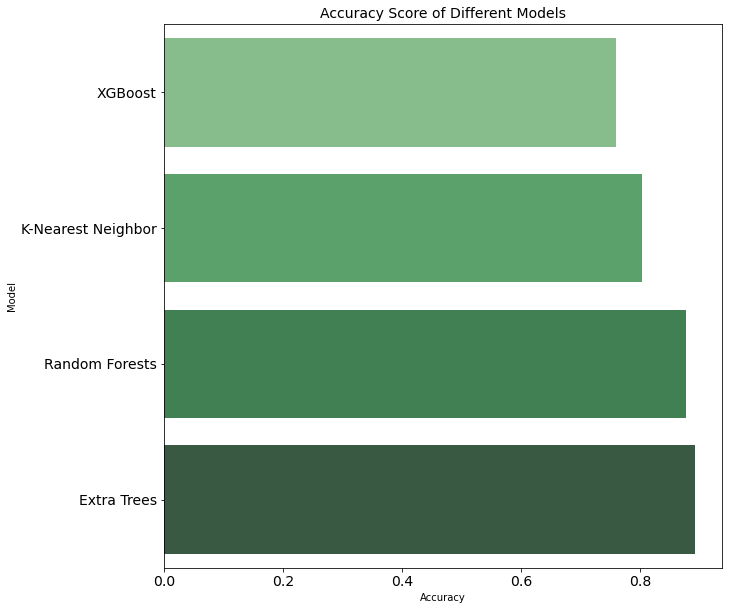

In [47]:
# create dataframe of accuracy and model and sort values
performance_comparison = pd.DataFrame({"Model": ["K-Nearest Neighbor", "Random Forests", "Extra Trees", "XGBoost"],
                                       "Accuracy": [knn_accuracy, rf_accuracy, xrf_accuracy, xgb_accuracy]})

performance_comparison = performance_comparison.sort_values(by="Accuracy", ascending=True)

# set the plot
plt.figure(figsize=(10,10))
ax = sns.barplot(x="Accuracy", y="Model", data=performance_comparison, palette="Greens_d")

# set title arrange labels
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Accuracy Score of Different Models", size=14)

# 5. Perform Hyperparameter Tuning on the Best Model

## 5.1. Extra Trees Classifier

Now, I am going to perform hyperparameter tuning on the best model (extra random forests classifier) and try to improve accuracy of the model. Searching and setting the best and optimal set of parameters for a machine learning model can be defined as hyperparameter tuning.

More than 80% accuracy can be interpreted as a reasonable score and managed not to fall the areas of underfitting or overfitting. One can call the model as underfit if s/he gets an accuracy score slightly more than the baseline metric, meaning the model fails to catch and learn from the patterns in the training set.

On the other hand, an accuracy score of more than 95% might show that the model already in the overfitted area. Meaning the model performed very well on the training data and captured the patterns but it might not show the same performance on the test data set. So one cannot conclude that the higher performance metric is always better.

Let's see if I can improve the accuracy of the model by playing with the parameters of [extra trees classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html) without falling into overfitting area.

### 5.1.1. Hyperparameter Tuning with Random Search and Cross-Validation

I am going to search for the best set of parameters with random search and cross validation.

In random serach, set of ML model's parameters are defined in a range and inputted to `RandomizedSearchCV`. This algorithm randomly selects some combination of the parameters and compares the defined `score` (accuracy, for this problem) with iterations. Random search runtime and iterations can be controlled with the parameter `n_iter`. This is in contrast to grid search iterations of every single combination of the given parameters. With intuition, one can say that, grid search requires more run-time than random search if a small number of n_iterations is defined. Generally, random search is better when there is a limited knowledge and of the best model hyperparameters and less time. 

K-fold Cross validation is the method used to assess the performance of the hyperparameters on the whole dataset. Rather than splitting the dataset set into 2 static subsets of training and test, dataset is divided equally for the given K, and with iterations different K subsets are trained and tested. In other words, divide the dataset into K folds, and follow the iterative process where first traininig is done on K-1 of the folds and then evaluate performance on the Kth fold. Process is repeated K times, so eventually dataset is tested on every example keeping in mind that each iteration is testing on a subset that did not train on before. At the end of K-fold cross validation, average of the performance metric on each of the K iterations substitutes the final performance measure.

A visualization of cross-validation:

![image](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


To perform hyperparameter tuning, I am going to define set of parameters and `RandomizedSearchCV` will look for the best combination with cross validation. So, randomly one single element is chosen from the below lists in each iteration. When the iteration is complete on each k-folds best set of parameters can be detected.

In [47]:
# The number of trees in the forest algorithm, default value is 10.
n_estimators = [50, 100, 300, 500, 1000]

# The minimum number of samples required to split an internal node, default value is 2.
min_samples_split = [2, 3, 5, 7, 9]

# The minimum number of samples required to be at a leaf node, default value is 1.
min_samples_leaf = [1, 2, 4, 6, 8]

# The number of features to consider when looking for the best split, default value is auto.
max_features = ['auto', 'sqrt', 'log2', None] 

# Define the grid of hyperparameters to search
hyperparameter_grid = {'n_estimators': n_estimators,
                       'min_samples_leaf': min_samples_leaf,
                       'min_samples_split': min_samples_split,
                       'max_features': max_features}

To find the best combination of the randomly set parameters and apply cross validation, I am going to use the `RandomizedSearchCV` with following arguments:
* `estimator`: the model
* `param_distributions`: the distribution of parameters we defined
* `cv`: K in the K-fold cross validation, number of subsets to create
* `n_iter`: the number of different combinations to try
* `scoring`: which metric to use when evaluating candidates
* `n_jobs`: number of cores to run in parallel (-1 will use all available)
* `verbose`: how much information to display (1 displays a limited amount)
* `return_train_score`: return the training score for each cross-validation fold
* `random_state`: fixes the random number generator used so we get the same results every run

In [48]:
# create model
best_model = ExtraTreesClassifier(random_state=42)

# create Randomized search object
random_cv = RandomizedSearchCV(estimator=best_model,
                               param_distributions=hyperparameter_grid,
                               cv=5, n_iter=20, 
                               scoring = 'accuracy',
                               n_jobs = -1, verbose = 1, 
                               return_train_score = True, 
                               random_state=42)

In [49]:
# Fit on the all training data using random search object
random_cv.fit(trees_training, labels_training)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=1)

In [50]:
random_cv.best_estimator_

ExtraTreesClassifier(min_samples_split=3, n_estimators=1000, random_state=42)

Here is the best combination of parameters:
* `n_estimators` = 300
* `max_features` = None
* `min_samples_leaf`= 1
* `min_samples_split`= 2

Let's apply those parameters to the extra random forests classifier model and see observe the improvement on the accuracy score.

In [54]:
xrf_classifier_w_random_search = ExtraTreesClassifier(n_estimators=300, 
                                                     max_features=None, 
                                                     min_samples_leaf=1, 
                                                     min_samples_split=2,
                                                     random_state=42)

xrf_accuracy_opt_w_rand_search = fit_evaluate_model(xrf_classifier_w_random_search, X_train, y_train, X_valid, y_valid)

In [55]:
print("Accuracy score in the previous extra random forests model:", xrf_accuracy)
print("Accuracy score after hyperparameter tuning:", xrf_accuracy_opt_w_rand_search)

Accuracy score in the previous extra random forests model: 0.8947544269963248
Accuracy score after hyperparameter tuning: 0.8837287003007016


After the hypermeter parameter tuning I increased the accuracy of the model by 2 to 3 points.

### 5.1.2. Possible further improvements with the GridSearch

With the random search, I am able to define a best set of parameters (might change for a different case and set of parameters though) as mentioned above. 

To recap, first I used default parameter settings to find which algorithm yields best performance. Then, I improved performance of the best selected algorithm (random forest classifier) by narrowing down to the set of parameters with random search.

Now, I am going to look if there is any room left for further improvement in accuracy score in the algorithm. I am going to look for that improvement in the `n_estimator` parameter, (number of decision trees used in the extra random forests). Having the possibility of long run-times in mind, I will use GridSearch with parameter n_estimators and pass a 6-element list as input, to keep the run-time at reasonable minutes. 

Like random search, grid search also performs its search on whole data set with k-fold cross validation. I am going to use 5-fold cross validation as I did for random search.

In [56]:
# Create a range of trees to evaluate
trees_grid = {'n_estimators': [300, 500, 700, 900, 1200, 1500]}

# define all parameters except n_estimators
xrf_classifier_w_grid_search = ExtraTreesClassifier(max_features=None, 
                                                    min_samples_leaf=1, 
                                                    min_samples_split=2,
                                                    random_state=42)

# Grid Search Object using the trees range, the model and 5-fold cross validation
grid_search = GridSearchCV(estimator = xrf_classifier_w_grid_search, param_grid=trees_grid, 
                           cv = 5, scoring = 'accuracy', verbose = 1,
                           n_jobs = -1, return_train_score = True)

In [57]:
# fit the dataset to grid search object
grid_search.fit(trees_training, labels_training)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=ExtraTreesClassifier(max_features=None, random_state=42),
             n_jobs=-1,
             param_grid={'n_estimators': [300, 500, 700, 900, 1200, 1500]},
             return_train_score=True, scoring='accuracy', verbose=1)

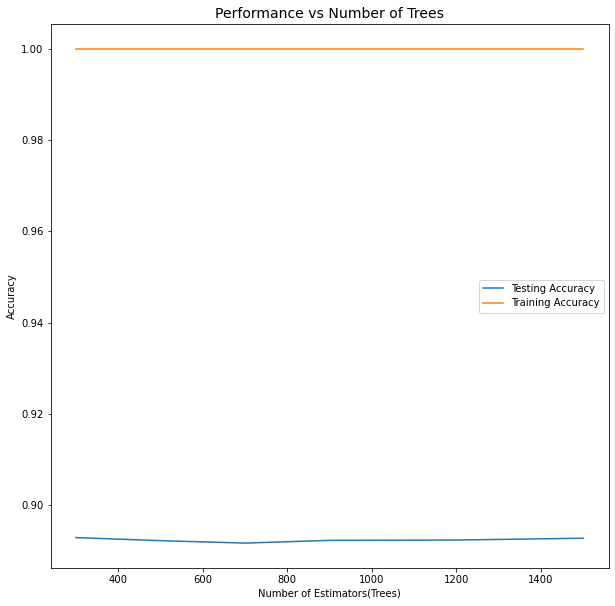

In [58]:
# Get the results into a dataframe
xrf_results = pd.DataFrame(grid_search.cv_results_)

# Plot the training and testing error vs number of trees
plt.figure(figsize=(10,10))
plt.plot(xrf_results['param_n_estimators'], xrf_results['mean_test_score'], label = 'Testing Accuracy')
plt.plot(xrf_results['param_n_estimators'], xrf_results['mean_train_score'], label = 'Training Accuracy')

# set title, labels and legend
plt.xlabel('Number of Estimators(Trees)'); plt.ylabel('Accuracy'); plt.legend();
plt.title('Performance vs Number of Trees', size=14);

Training accuracy is very 100% percent, showing that the model studied and learned from the training set very well. 

When it comes to testing accuracy, accuracy drops 20 points, resulting in accuracy level around 80%. This shows that the model is performing worse in a newly-introduced dataset. This picture also gives a clue about the submission score, I expect it to be around 80%.

Another important message is, There are slight changes in the accuracy for the test set which means number of estimators trees can be improved further. Let's see what is the best n_estimator value.

In [59]:
xrf_results[["param_n_estimators", "params", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False)

,param_n_estimators,params,mean_test_score
0,300,{'n_estimators': 300},0.892862
5,1500,{'n_estimators': 1500},0.892728
4,1200,{'n_estimators': 1200},0.892327
3,900,{'n_estimators': 900},0.892260
1,500,{'n_estimators': 500},0.892193
2,700,{'n_estimators': 700},0.891659


Model performed best when n_estimators are 500. So I am going to update model with that parameter.

In [60]:
xrf_optimal_model = ExtraTreesClassifier(n_estimators=500, 
                                           max_features=None, 
                                           min_samples_leaf=1, 
                                           min_samples_split=2,
                                           random_state=42)

xrf_optimal_model_accuracy = fit_evaluate_model(xrf_optimal_model, X_train, y_train, X_valid, y_valid)

In [61]:
print("Accuracy score with random forests model when n_estimators=300:", xrf_accuracy_opt_w_rand_search)
print("Accuracy score with random forests model when n_estimators=500:", xrf_optimal_model_accuracy)

Accuracy score with random forests model when n_estimators=300: 0.8837287003007016
Accuracy score with random forests model when n_estimators=500: 0.8823922485800201


## 5.3. Visualization of the best model predictions

I am going to use the [function](https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823) mentioned in the sci-kit learn documentation to print confusion_matrix. Confusion matrix will show the number of predictions made in each category with actual and predicted values, by comparing the actual labels and the prediected labels. 

Fantastic tree confusion matrix will be a 7x7 matrix. I will use normalized confusion matrix, so percentage of actual tree type correctly guessed out of all guesses in that particular category will appear in the diagonal of the matrix and non-diagonal elements will show misslabeled elements by the model. The higher the diagonal percentages of the confusion matrix the better, indicating many correct predictions.

In [62]:
# create set of y_predictions
y_predicted = xrf_optimal_model.predict(X_valid)

In [63]:
# make a list of cover_types
cover_types = sorted(trees['Cover_Type'].value_counts().index.tolist())

In [64]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    # else:
        # print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


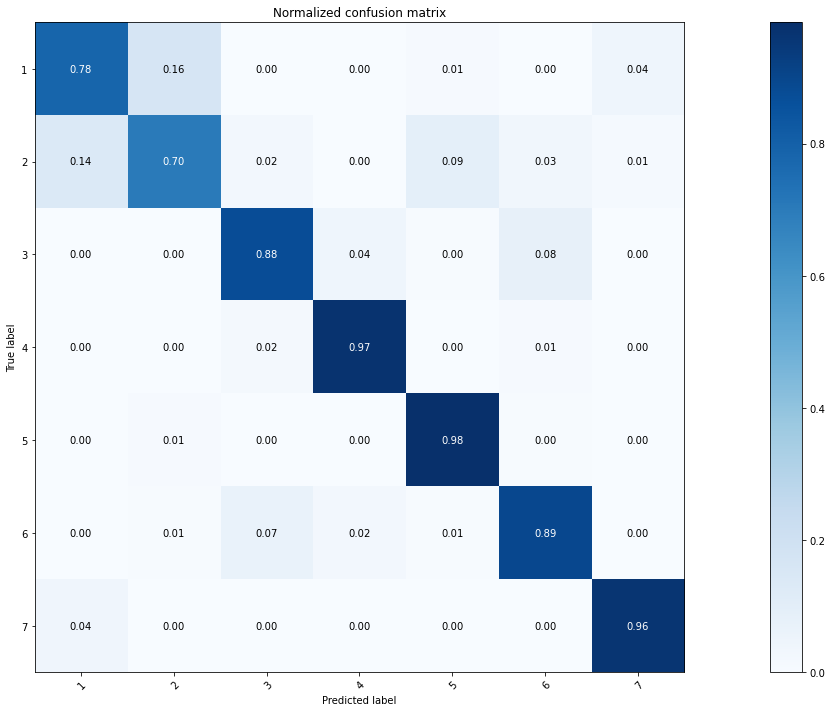

In [65]:
plot_confusion_matrix(y_valid, y_predicted, classes=cover_types, normalize=True,
                      title='Normalized confusion matrix')
plt.show()

Model did pretty good detecting fantastic trees of type 3,4, 5, 6 and 7, and it seems a bit confused to detect types 1 and 2.

# 6. Evaluate the Best Model with Test Data

## 6.1. Align test set with the training set

In [72]:
trees_test = pd.read_csv('../map553-2022/test-full.csv')

In [73]:
# add numeric soil type column
reverse_one_hot_encode(trees_test, 16, 56, "Soil_Type")

In [74]:
# add linear combinations of columns
trees_test['Euclidian_Distance_To_Hydrology'] = (trees_test['Horizontal_Distance_To_Hydrology']**2 + 
                                                 trees_test['Vertical_Distance_To_Hydrology']**2)**0.5
trees_test['Mean_Elevation_Vertical_Distance_Hydrology'] = (trees_test['Elevation'] + 
                                                            trees_test['Vertical_Distance_To_Hydrology'])/2
trees_test['Mean_Distance_Hydrology_Firepoints'] = (trees_test['Horizontal_Distance_To_Hydrology'] + 
                                                    trees_test['Horizontal_Distance_To_Fire_Points'])/2
trees_test['Mean_Distance_Hydrology_Roadways'] = (trees_test['Horizontal_Distance_To_Hydrology'] + 
                                                  trees_test['Horizontal_Distance_To_Roadways'])/2
trees_test['Mean_Distance_Firepoints_Roadways'] = (trees_test['Horizontal_Distance_To_Fire_Points'] + 
                                                   trees_test['Horizontal_Distance_To_Roadways'])/2

In [75]:
# transfrom columns 
trees_test['sqrt' + 'Horizontal_Distance_To_Hydrology'] = np.sqrt(trees_test['Horizontal_Distance_To_Hydrology'])
trees_test['sqrt' + 'Mean_Distance_Hydrology_Roadways'] = np.sqrt(trees_test['Mean_Distance_Hydrology_Roadways'])
trees_test['sqrt' + 'Euclidian_Distance_To_Hydrology'] = np.sqrt(trees_test['Euclidian_Distance_To_Hydrology'])

In [76]:
X_test = trees_test[all_features]
print(X_test.columns)

Index(['Elevation', 'Aspect', 'Slope', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type',
       'sqrtHorizontal_Distance_To_Hydrology',
       'sqrtMean_Distance_Hydrology_Roadways',
       'sqrtEuclidian_Distance_To_Hydrology',
       'Mean_Elevation_Vertical_Distance_Hydrology',
       'Mean_Distance_Firepoints_Roadways',
       'Mean_Distance_Hydrology_Firepoints'],
      dtype='object')


## 6.2. Make sure of the test data shape and there aren't any missing values

In [77]:
print('Test Data Shape:', X_test.shape)

Test Data Shape: (581012, 19)


In [78]:
print(X_test.isnull().sum())

Elevation                                     0
Aspect                                        0
Slope                                         0
Vertical_Distance_To_Hydrology                0
Horizontal_Distance_To_Roadways               0
Hillshade_Noon                                0
Hillshade_3pm                                 0
Horizontal_Distance_To_Fire_Points            0
Wilderness_Area1                              0
Wilderness_Area2                              0
Wilderness_Area3                              0
Wilderness_Area4                              0
Soil_Type                                     0
sqrtHorizontal_Distance_To_Hydrology          0
sqrtMean_Distance_Hydrology_Roadways          0
sqrtEuclidian_Distance_To_Hydrology           0
Mean_Elevation_Vertical_Distance_Hydrology    0
Mean_Distance_Firepoints_Roadways             0
Mean_Distance_Hydrology_Firepoints            0
dtype: int64


There are no NA values in the test data set, which is ready to be inputted in a ML model.
In the training set, there are more than 12000 rows, and the test has much more rows (almost 500.000) than the tarining set. Let's see how the model will deal with a much bigger dataset!

In [79]:
# generate predictions for test data
test_predictions = xrf_optimal_model.predict(X_test)

In [80]:
# write results to the dataframe and create file for submission
output = pd.DataFrame({'Id': trees_test["Id"],
                       'Cover_Type': test_predictions})
output.to_csv('submission.csv', index=False)

# 7. Interpret Model Results

## 7.1. Feature importances

Remember, in the exploratory data analysis I looked at the pearson coeffients of the features. Since final results are generated, I will revisit this picture and observe features with the highest contribution to the model predictions. `feature_importances` attribute will be used for this.

In [81]:
#create list of features
features = list(trees_training.columns)

# Extract the feature importances into a dataframe
feature_results = pd.DataFrame({'feature': features, 
                                'importance': xrf_optimal_model.feature_importances_})

# Show the top 10 most important
feature_results = feature_results.sort_values('importance', ascending = False).reset_index(drop=True)
feature_results.head(10)

,feature,importance
0,Elevation,0.204415
1,Soil_Type,0.147277
2,Mean_Elevation_Vertical_Distance_Hydrology,0.091262
3,Wilderness_Area4,0.066585
4,Mean_Distance_Firepoints_Roadways,0.052633
5,Horizontal_Distance_To_Roadways,0.044264
6,Aspect,0.043101
7,sqrtEuclidian_Distance_To_Hydrology,0.041664
8,Horizontal_Distance_To_Fire_Points,0.040275
9,sqrtHorizontal_Distance_To_Hydrology,0.040075


Top 10 Pearson Correlations before building the model:

In [82]:
correlations_transformed.head(5)

,Feature,Correlation with Cover_Type
30,sqrtWilderness_Area1,-0.219949
10,Wilderness_Area1,-0.219949
5,Horizontal_Distance_To_Roadways,-0.109985
20,Mean_Distance_Firepoints_Roadways,-0.107544
19,Mean_Distance_Hydrology_Roadways,-0.106105


In [83]:
correlations_transformed.tail(5)

,Feature,Correlation with Cover_Type
14,Soil_Type,0.077395
2,Slope,0.081493
23,sqrtSlope,0.085455
32,sqrtWilderness_Area3,0.131472
12,Wilderness_Area3,0.131472


# 8. Summary & Conclusisons

Now it is time to answer the headline!

## 8.1. Where to Find Fantastic Trees?

Spruce/Fir, Lodgepole Pine and Krummholz loves to hangout in Rawah, Neota and Comanche Peak Wilderness Area.

Cache la Poudre Wilderness Area is perfect place for Ponderosa Pine and Cottonwood/Willow.

If you see an Aspen suspect that you might be at the Rawah or Comanche.

Douglas-fir is an easy going species, that goes along with any wilderness area.

## 8.2. How to Detect Fantastic Trees?

To recognize fantastic trees, I analyzed them first, determined and transformed some of their features (like characteristics). 

To classify them, I implemented a extra random forest classifier model (how funny that fantastic trees are classifed with extra random forests model), fine tuned the model and generated predictions. 

**Most importantly: **

With the current workflow, and selection of features, extra random forests model and parameters I succesfully detected more than 75 percent of the fantastic trees correctly!
<br>(Previously submitted accuracy score was 72% with random forests model)</br>

Extra random forests classification showed that:

* elevation
* soil type
* mean distance of elevation and vertical distance hydrology
* wilderness_Area4
* mean distance of horizontal distance to firepoints and roadways are the most important characteristics of a fantastic tree.

Top 5 features list stressed the importance of feature engineering and selection. 3 of the Top 5 features are created in the scope of this notebook.

![end credits](https://i.ytimg.com/vi/WfvD-JZGlHs/maxresdefault.jpg)

[Image Credits](https://www.youtube.com/watch?v=WfvD-JZGlHs)

### And many thanks for reading until the end, if I am able to share my knowledge with you or at least created some inspiration in you, I will appreciate your upvote.